# ABC Investment Assignment

## Objective

- ABC Investments wants to make investments in a few companies. 
- ABC Investments wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.
- To identify the best sectors, countries, and a suitable investment type for making investments.

## Constraints 

1.	It wants to invest between 8 to 15 million USD per round of investment
2.	It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.


# Datasets

- companies: A table with basic details of companies 
- rounds2: Funding round details 
- mapping: This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names.
- country: A table contains english speaking country details.

In [663]:
import numpy             as np # importing necessary libraries
import pandas            as pd
import scipy.stats       as stats
import matplotlib.pyplot as plt
import seaborn           as sns

# Company details

In [664]:
comp=pd.read_csv("/Users/yashnaik12/Desktop/Data-Analysis/comp.txt",error_bad_lines=False,encoding= 'unicode_escape',sep="\t")
comp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [665]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [666]:
comp.describe(include="object")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Interactive-Bid-Games-Inc,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


# Funding details

In [667]:
funding=pd.read_csv("/Users/yashnaik12/Desktop/Data-Analysis/inv_rnd2.csv",encoding= 'unicode_escape')
funding.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [668]:
funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [669]:
funding.describe(include="object")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,90247,114949,14,8,5033
top,/ORGANIZATION/SOLARFLARE,/funding-round/2e4a40307fba7ef425cbb7fb26e85c66,venture,A,01-01-2014
freq,10,1,55494,14747,779


In [670]:
funding['company_permalink'] = funding['company_permalink'].str.lower() #unique companies are present in inv_rnd2
print(len(funding['company_permalink'].unique()))

66370


In [671]:
comp['permalink'] = comp['permalink'].str.lower() #unique companies are present in companies
print(len(comp['permalink'].unique()))

66368


- From above observation there are two companies present in the inv_rnd2 file but not present in companies file.

# Master Frame (Merging of companies and inv_rnd2 files)

In [672]:
funding['permalink'] = funding['company_permalink'].str.lower() #renaming column of inv_rnd2 file which is common in companies file

In [673]:
master_frame = pd.merge(funding, comp , how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [674]:
master_frame.shape

(114942, 16)

In [675]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [676]:
master_frame.describe(include="object")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114942,114942,114942,31139,114942,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422
unique,66363,114942,14,8,5033,66363,66097,61188,27295,4,137,311,1092,5111,3977
top,/organization/solarflare,/funding-round/2e4a40307fba7ef425cbb7fb26e85c66,venture,A,01-01-2014,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,19,1,55493,14746,779,19,19,19,8165,90151,72308,26664,19078,7422,4642


# Data cleaning 

In [677]:
master_frame.isnull().sum(axis=0) #observing missing values values in the master_frame

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

### Now i have to analyse :    

1.What type of investment is the best?
2.How much amount is raised in perticular type of funding round?
3.Which is the top 3 english speaking countries in which investments are higher.

In [678]:
master_frame = master_frame.drop('homepage_url', axis=1) #dropping unnecessary columns.
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('status', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('permalink', axis=1)

In [679]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,CHN


In [680]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   raised_amount_usd        94958 non-null   float64
 4   name                     114941 non-null  object 
 5   category_list            111535 non-null  object 
 6   country_code             106271 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [681]:
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19984
name                           1
category_list               3407
country_code                8671
dtype: int64

In [682]:
master_frame["raised_amount_usd"].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

- Now i have missing values in raised_amount_usd(17% of the data),category_list(3%),country_code(8%)columns.
- I have to drop these rows which has missing values present in raised_amount_usd because rows which has undisclosed amount is in no use for my analysis.There is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean.
- I am dropping rows which has missing values present in category_list because its just 3% of our data.

In [683]:
master_frame.dropna(subset=['raised_amount_usd'],inplace=True)
master_frame.dropna(subset=['category_list'],inplace=True)

In [684]:
master_frame.isnull().sum(axis=0)

company_permalink             0
funding_round_permalink       0
funding_round_type            0
raised_amount_usd             0
name                          1
category_list                 0
country_code               5385
dtype: int64

In [685]:
master_frame.shape

(93914, 7)

- Now i have missing values in country code which is around 5% of the data.Since i have enough amount of data for the analysis i am dropping them as well.

In [686]:
master_frame.dropna(subset=['country_code'],inplace=True)

In [687]:
master_frame.shape

(88529, 7)

In [688]:
master_frame.isnull().sum(axis=0)

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       1
category_list              0
country_code               0
dtype: int64

In [689]:
master_frame["funding_round_type"].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [690]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

In [691]:
master_frame.groupby('funding_round_type').raised_amount_usd.mean()

funding_round_type
angel                      0.971574
convertible_note           1.337187
debt_financing            17.167653
equity_crowdfunding        0.509898
grant                      4.512698
non_equity_assistance      0.480753
post_ipo_debt            169.451790
post_ipo_equity           66.077059
private_equity            73.938486
product_crowdfunding       1.353227
secondary_market          84.438532
seed                       0.747794
undisclosed               15.891661
venture                   11.724223
Name: raised_amount_usd, dtype: float64

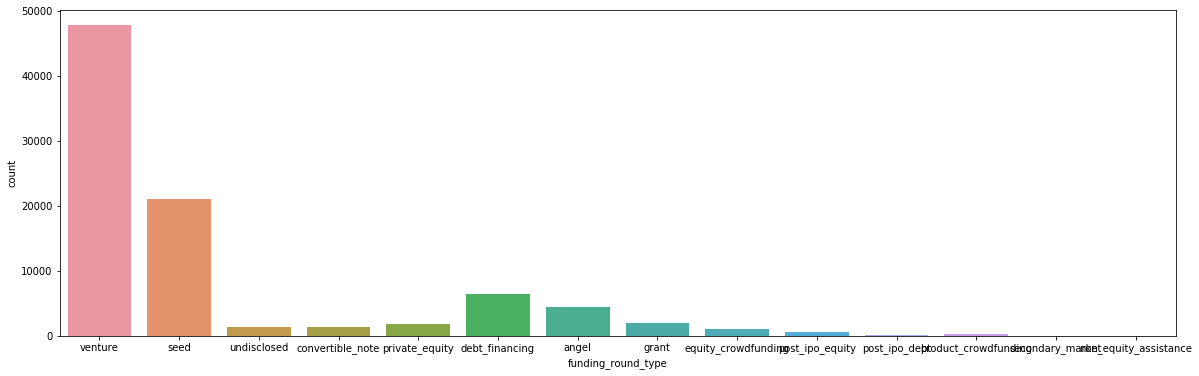

In [692]:
plt.figure(figsize=(20, 6))
sns.countplot(x="funding_round_type", data=master_frame)
plt.show()

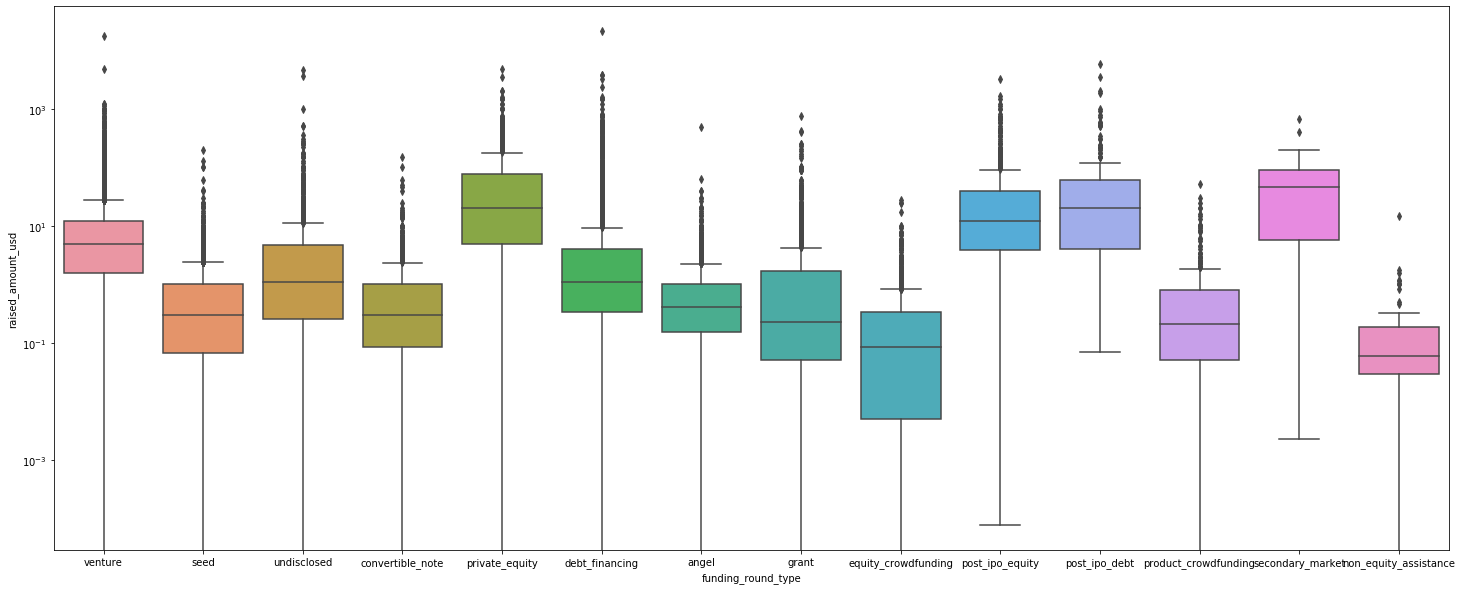

In [693]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

- Now we need to analyse average values of investments only for venture,seed,angel and private equity funding types.
- Average funding amount of venture type is 11.2 million USD
- Average funding amount of angel type is 0.97 million USD
- Average funding amount of seed type is 0.74 million USD
- Average funding amount of private equity type 73.9 million USD

### Investment has to be between 8 to 15 million USD So Venture is the best investment type.

## Best Country to Invest in

## Country Details

In [694]:
country=pd.read_csv("/Users/yashnaik12/Desktop/Data-Analysis/country.csv")
country.head()

,Nr,Country,Alpha-3 Code,Region,Population,Primary Language
0,1,Antigua and Barbuda,ATG,Caribbean,"85,000",Yes
1,2,Bahamas,BHS,Caribbean,"3,31,000",Yes
2,3,Barbados,BRB,Caribbean,"2,94,000",Yes
3,4,Belize,BLZ,Central America,"2,88,000",Yes
4,5,Botswana,BWA,Africa,"18,82,000",No


In [695]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nr                61 non-null     int64 
 1   Country           61 non-null     object
 2   Alpha-3 Code      61 non-null     object
 3   Region            61 non-null     object
 4   Population        61 non-null     object
 5   Primary Language  61 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.0+ KB


In [696]:
country.describe(include="object")

,Country,Alpha-3 Code,Region,Population,Primary Language
count,61,61,61,61,61
unique,61,61,10,60,17
top,United States,ATG,Africa,"20,000",No
freq,1,1,22,2,23


In [697]:
country=country[(country["Primary Language"]=="Yes")]
country.head(19)

,Nr,Country,Alpha-3 Code,Region,Population,Primary Language
0,1,Antigua and Barbuda,ATG,Caribbean,"85,000",Yes
1,2,Bahamas,BHS,Caribbean,"3,31,000",Yes
2,3,Barbados,BRB,Caribbean,"2,94,000",Yes
3,4,Belize,BLZ,Central America,"2,88,000",Yes
8,9,Cook Islands,COK,Oceania,"20,000",Yes
9,10,Dominica,DMA,Caribbean,"73,000",Yes
15,16,Guyana,GUY,South America,"7,38,000",Yes
18,19,Jamaica,JAM,Caribbean,"27,14,000",Yes
22,23,Liberia,LBR,Africa,"37,50,000",Yes
34,35,Papua New Guinea,PNG,Oceania,"70,59,653",Yes


- USA(268 million) and United kingdom(59.6 million) has the highest english speaking population.
- But according to wikipedia India has the second highest english speaking population(125 million).
- In india english is not a primary language but it is one of the official language which is widely used in corporate sector and educational sector.

##### Now considering only venture funding type for the analysis.

In [698]:
master_frame = master_frame[master_frame.funding_round_type=="venture"]

In [699]:
master_frame["country_code"].value_counts()

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
       ...  
MCO        1
LAO        1
SEN        1
MMR        1
MAR        1
Name: country_code, Length: 97, dtype: int64

In [700]:
master_frame["country_code"].describe()

count     47809
unique       97
top         USA
freq      35943
Name: country_code, dtype: object

In [701]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
Name: raised_amount_usd, dtype: float64

In [702]:
master_frame= master_frame[(master_frame.country_code=='USA') | (master_frame.country_code=='CHN') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND') | (master_frame.country_code=='CAN')]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000000,#fame,Media,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.000000,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.700000,H2O.ai,Analytics,USA


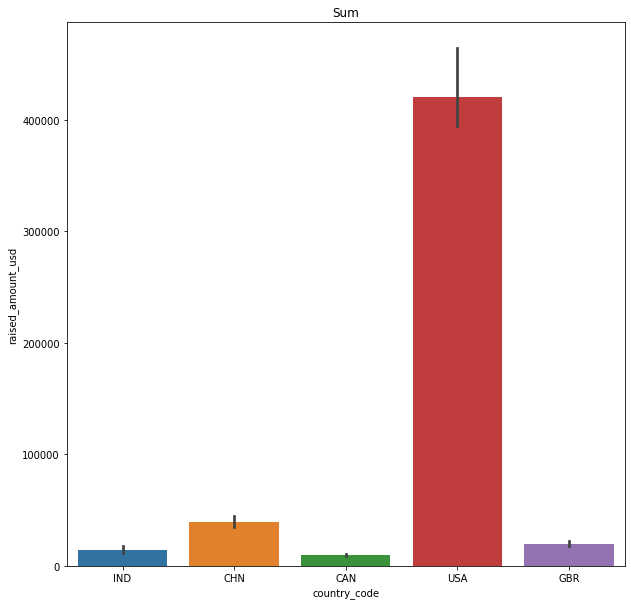

In [703]:
plt.figure(figsize=(10,10))
sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame, estimator=sum)
plt.title("Sum")
plt.show()

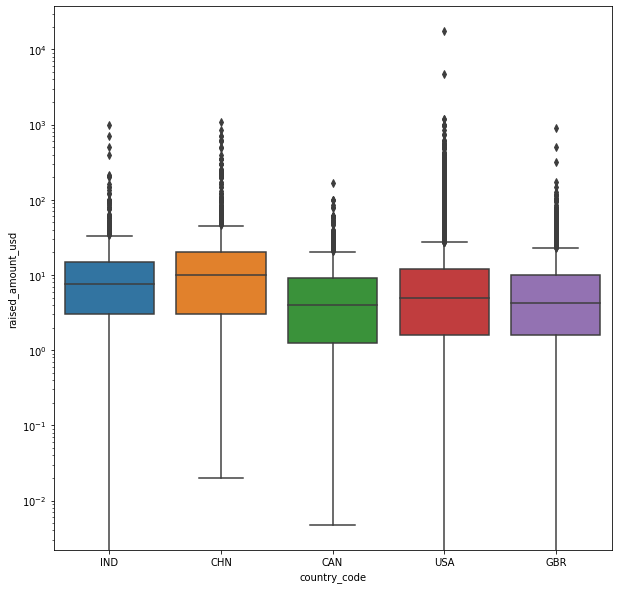

In [704]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

- USA, GBR and IND are the top three English speaking countries.Because China is not an english speaking country.

##### Now considering only venture funding type and these top three countries for the analysis.

In [705]:
master_frame= master_frame[(master_frame.country_code=='USA') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND')]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,#fame,Media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


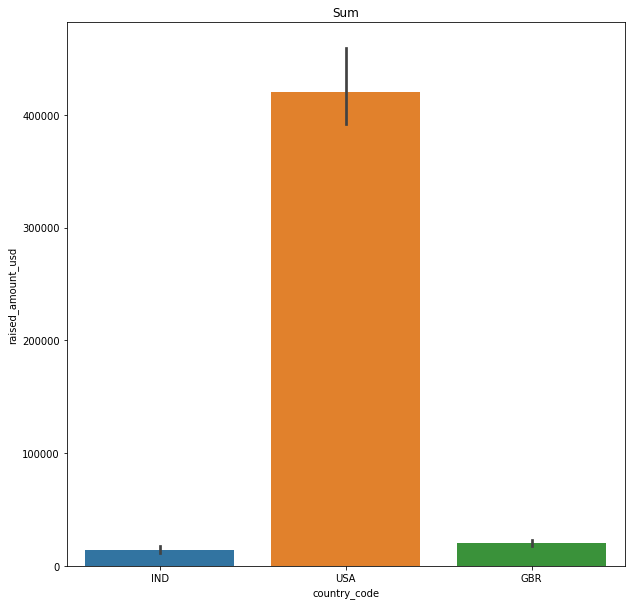

In [706]:
plt.figure(figsize=(10,10))
sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame, estimator=sum)
plt.title("Sum")
plt.show()


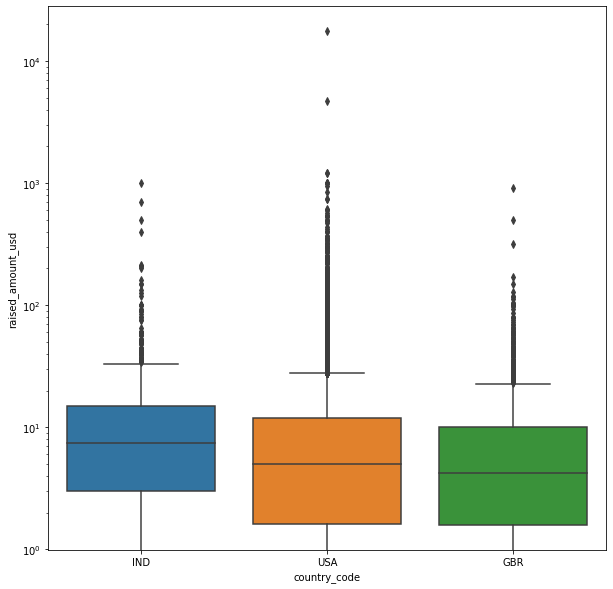

In [707]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

- Investors are investing more in USA,GBR and India.

# Various categories and sectors details

In [708]:
sector=pd.read_csv("/Users/yashnaik12/Desktop/Data-Analysis/maps.csv")
sector.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [709]:
sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [710]:
sector.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [711]:
sector.dropna(subset=['category_list'],inplace=True)
sector.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

- Now we have to merge mapping file with master_frame on category list.

In [712]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,#fame,Media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


In [713]:
master_frame["category_list"].value_counts()

Biotechnology                                                               4633
Software                                                                    3238
Health Care                                                                 1224
Clean Technology                                                            1040
Enterprise Software                                                         1012
                                                                            ... 
Communications Infrastructure|Internet of Things|Transportation|Wireless       1
Credit Cards|Gift Card|Payments                                                1
Waste Management                                                               1
Bicycles|E-Commerce|Retail|Transportation                                      1
CRM|Human Resources|iPhone|Project Management|Software                         1
Name: category_list, Length: 7798, dtype: int64

In [714]:
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,#fame,Media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5.0,1 Mainstream,Apps,USA


In [715]:
master_frame = master_frame.drop('funding_round_type', axis=1)

In [716]:
master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5.0,1 Mainstream,Apps,USA


In [717]:
sector.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [718]:
master_frame = pd.merge(master_frame, sector, how='inner', on="category_list")
master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,15.0,90min,Media,GBR,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,5.8,90min,Media,GBR,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,18.0,90min,Media,GBR,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,5.0,All Def Digital,Media,USA,0,0,0,1,0,0,0,0,0


In [719]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36187 entries, 0 to 36186
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   company_permalink                        36187 non-null  object 
 1   funding_round_permalink                  36187 non-null  object 
 2   raised_amount_usd                        36187 non-null  float64
 3   name                                     36187 non-null  object 
 4   category_list                            36187 non-null  object 
 5   country_code                             36187 non-null  object 
 6   Automotive & Sports                      36187 non-null  int64  
 7   Blanks                                   36187 non-null  int64  
 8   Cleantech / Semiconductors               36187 non-null  int64  
 9   Entertainment                            36187 non-null  int64  
 10  Health                                   36187

### We need to Identify which category comes under which sector for that using melt function.

In [720]:
value_vars = master_frame.columns[6:15] # store the value and id variables in two separate arrays

In [721]:
id_vars = master_frame.columns[0:6] #rest of the columns

In [722]:
master_frame = pd.melt(master_frame,id_vars=list(id_vars),value_vars=list(value_vars))
master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,variable,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND,Automotive & Sports,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,15.0,90min,Media,GBR,Automotive & Sports,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,5.8,90min,Media,GBR,Automotive & Sports,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,18.0,90min,Media,GBR,Automotive & Sports,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,5.0,All Def Digital,Media,USA,Automotive & Sports,0


In [723]:
master_frame = master_frame[master_frame['value']==1] #removing value=0
master_frame = master_frame.drop('value', axis=1)

In [724]:
master_frame = master_frame[(master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]

In [725]:
master_frame.groupby(['country_code', 'variable']).raised_amount_usd.agg(['count','sum'])

count           sum
country_code variable                                                    
GBR          Automotive & Sports                         16    167.051565
             Cleantech / Semiconductors                 127   1136.905008
             Entertainment                               54    461.511059
             Health                                      24    214.537510
             Manufacturing                               42    361.940335
             News, Search and Messaging                  73    615.746235
             Others                                     143   1249.124289
             Social, Finance, Analytics, Advertising     98    821.888357
IND          Automotive & Sports                         13    136.900000
             Cleantech / Semiconductors                  20    165.380000
             Entertainment                               33    280.830000
             Health                                      19    167.740000
             Manufacturing                               21    200.900000
             News, Search and Messaging                  52    433.834545
             Others                                     109   1007.409507
             Social, Finance, Analytics, Advertising     32    290.543500
USA          Automotive & Sports                        167   1454.104361
             Cleantech / Semiconductors                2297  21181.003033
             Entertainment                              580   5000.212982
             Health                                     908   8200.859357
             Manufacturing                              799   7258.553378
             News, Search and Messaging                1563  13796.816094
             Others                                    2923  26089.280296
             Social, Finance, Analytics, Advertising   1912  16680.695048

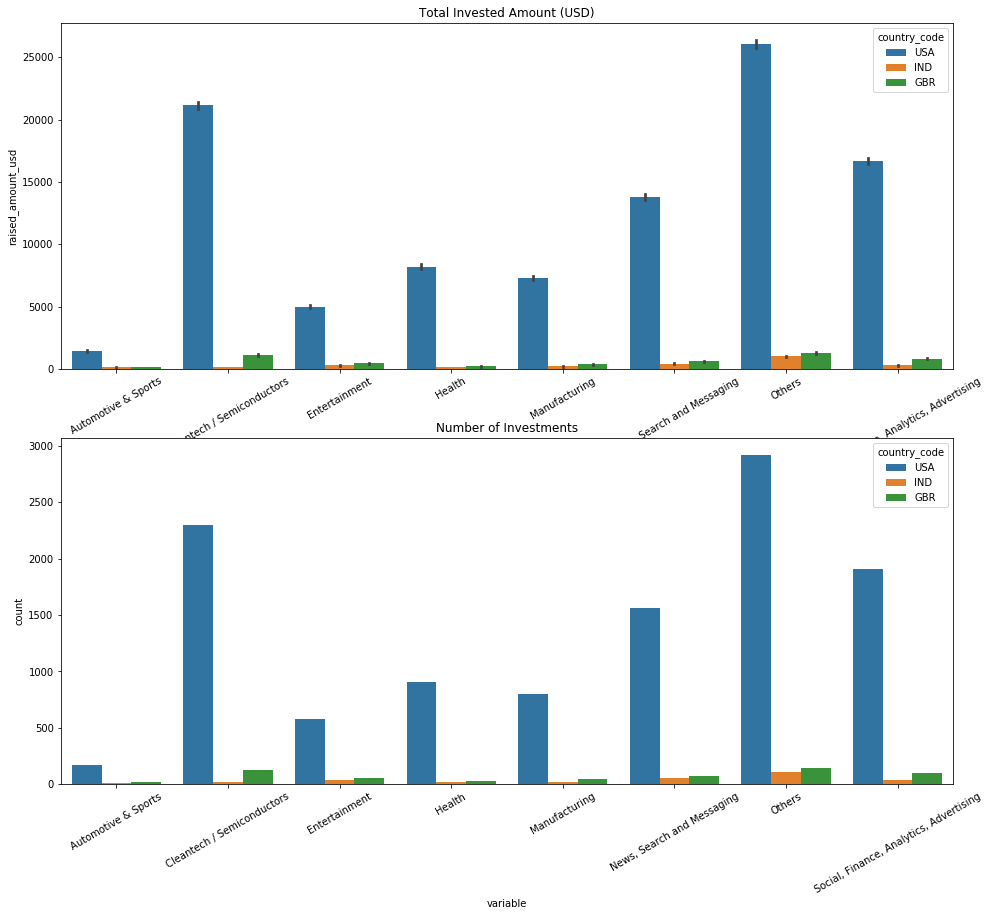

In [726]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='variable', y='raised_amount_usd', hue='country_code', data=master_frame, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='variable', hue='country_code', data=master_frame)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

## Company wise analysis

In [727]:
master_frame["country_code"].value_counts()

USA    11149
GBR      577
IND      299
Name: country_code, dtype: int64

In [728]:
master_frame_usa= master_frame[(master_frame.country_code=='USA')]
master_frame_usa.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,variable
23933,/organization/3d-robotics,/funding-round/2785595770e91ab8fd4854ef125ec563,5.0,3D Robotics,Drones,USA,Automotive & Sports
23934,/organization/3d-robotics,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,14.0,3D Robotics,Drones,USA,Automotive & Sports
23937,/organization/cape-productions,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,10.0,Cape Productions,Drones,USA,Automotive & Sports
23938,/organization/dronedeploy,/funding-round/bdf644f3fa66533c048719bf0d000893,9.0,DroneDeploy,Drones,USA,Automotive & Sports
23941,/organization/ehang,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,10.0,Ehang,Drones,USA,Automotive & Sports


In [729]:
master_frame_usa[master_frame_usa['variable'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/virtustream            64.300000
/organization/capella                54.968051
/organization/airtight-networks      54.201907
/organization/decarta                52.100000
/organization/black-duck-software    51.000000
Name: raised_amount_usd, dtype: float64

In [730]:
master_frame_usa[master_frame_usa['variable'] == "Cleantech / Semiconductors" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/biodesix         75.300000
/organization/tigo-energy      68.739496
/organization/forsight-labs    61.300001
/organization/rheonix          56.124758
/organization/scienergy        55.375423
Name: raised_amount_usd, dtype: float64

In [731]:
master_frame_GBR= master_frame[(master_frame.country_code=='GBR')]
master_frame_GBR.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,variable
25473,/organization/autoquake,/funding-round/067d143de46ec298cfa1893682f9911a,11.890000,Autoquake,Automotive,GBR,Automotive & Sports
25474,/organization/autoquake,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,6.000000,Autoquake,Automotive,GBR,Automotive & Sports
25475,/organization/autoquake,/funding-round/721aefa6f7e5bc71eb9d744359941958,5.755376,Autoquake,Automotive,GBR,Automotive & Sports
25476,/organization/autoquake,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,11.911764,Autoquake,Automotive,GBR,Automotive & Sports
25499,/organization/carwow,/funding-round/76b8bfeb7ef05fb7c0be2b9a70e7d2ed,7.230241,Carwow,Automotive,GBR,Automotive & Sports


In [732]:
master_frame_GBR[master_frame_GBR['variable'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/electric-cloud             37.000000
/organization/sensage                    36.250000
/organization/enigmatic                  32.500000
/organization/silverrail-technologies    29.000000
/organization/opencloud                  27.972766
Name: raised_amount_usd, dtype: float64

In [733]:
master_frame_GBR[master_frame_GBR['variable'] == "Cleantech / Semiconductors" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/eusa-pharma                                                      35.600000
/organization/horizon-discovery                                                31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29.132906
/organization/elixent                                                          25.000000
/organization/takeda-cambridge                                                 22.340000
Name: raised_amount_usd, dtype: float64

In [734]:
master_frame_IND= master_frame[(master_frame.country_code=='IND')]
master_frame_IND.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,variable
25452,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,5.0,Ola,Automotive,IND,Automotive & Sports
25464,/organization/ather-energy,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,12.0,Ather Energy,Automotive,IND,Automotive & Sports
25494,/organization/cardekho,/funding-round/3875ae874b0511ede2f7d8597e0d126f,15.0,Cardekho,Automotive,IND,Automotive & Sports
25553,/organization/incredible-technologies-pvt-ltd,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,15.0,Incredible Technologies (CredR),Automotive,IND,Automotive & Sports
25625,/organization/taxiforsure-com,/funding-round/29b13629e3dd0f4d53ab84a6c89548c2,10.0,TaxiForSure.com,Automotive,IND,Automotive & Sports


In [735]:
master_frame_IND[master_frame_IND['variable'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/firstcry-com        39.0
/organization/myntra              38.0
/organization/commonfloor         32.9
/organization/pepperfry-com       28.0
/organization/itzcash-card-ltd    25.0
Name: raised_amount_usd, dtype: float64

In [736]:
master_frame_IND[master_frame_IND['variable'] == "News, Search and Messaging" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    33.0
/organization/imimobile                           23.0
/organization/sms-gupshup                         22.0
/organization/hike                                21.0
/organization/roadrunnr                           21.0
Name: raised_amount_usd, dtype: float64

# Conclusion

### The top country in terms of the number of investments and the total amount invested is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.